In [9]:
import torch
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import random

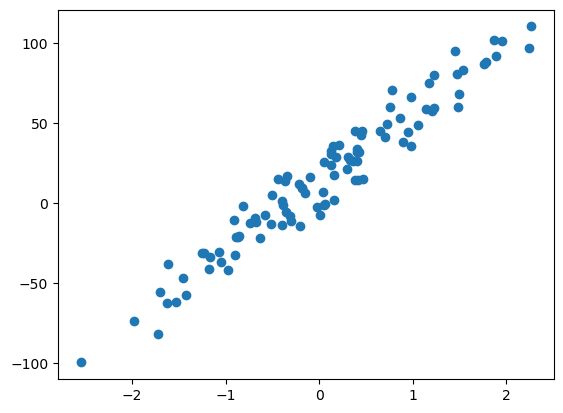

In [79]:
# 创建数据集
def create_dataset():
    x, y, coef = make_regression(n_samples=100,  #样本数量
                                 n_features=1,   #每个样本特征个数
                                 noise=10,       #噪音大小
                                 coef=True,      #???
                                 bias=14.5,      #偏执
                                 random_state=0) #随机状态，0表示不随机
    return torch.tensor(x), torch.tensor(y), coef

# 数据加载器
def data_loader(x,y, batch_size):
    #计算样本数量
    data_len = len(y)
    #构建数据索引
    data_index = list(range(data_len))
    #每次数据都打乱
    random.shuffle(data_index)
    #计算总批次数
    batch_number = data_len // batch_size
    
    for idx in range(batch_number):
        start = idx*batch_size
        end = start + batch_size
        
        batch_train_x = x[start: end]
        batch_train_y = y[start: end]
        
        yield batch_train_x, batch_train_y
        

###### 创建数据集
x,y,coef = create_dataset()
plt.scatter(x,y)
plt.show()

#####  加载数据集
for a,b in data_loader(x,y, batch_size=50):
    # print('->', a)
    # print('->', b)
    # print('-' * 100)
    pass

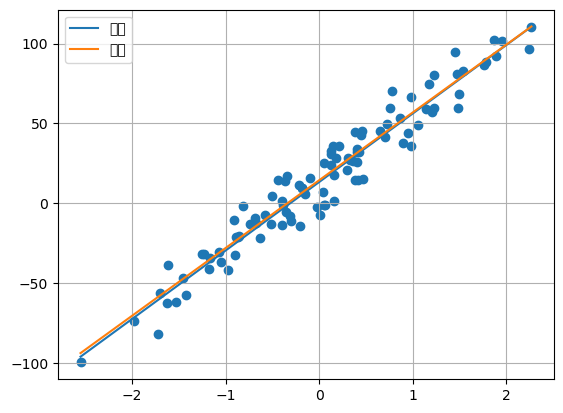

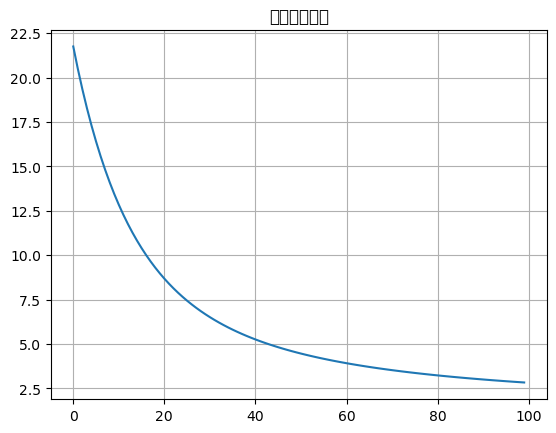

In [97]:
## 权重；假设函数
w = torch.tensor(0.1, requires_grad=True, dtype=torch.float64)
b = torch.tensor(0.0, requires_grad=True, dtype=torch.float64)
# 假设函数
def linear_regression(x):
    return w * x + b

# 损失函数
def square_loss(y_pred, y_true):
    return (y_pred - y_true) ** 2

# 梯度下降优化方法
def sgd(lr=0.01):
    w.data = w.data - lr * w.grad.data
    b.data = b.data - lr * b.grad.data 
    #print(w.grad)
    
## 训练
def train():
    # 创建数据集，会返回100个样本
    x,y,coef = create_dataset()
    # 定义参数
    epochs = 100
    lr = 0.001
    # 存储每次训练的损失数据
    epoch_loss = []
    # 总损失
    total_loss = 0.0
    # 样本数
    train_samples = 0 
    

    for _ in range(epochs):
        # 批量读数据开始训练 
        for train_x, train_y in data_loader(x, y, batch_size=32):
            # 预测数据
            y_pred = linear_regression(train_x)

            # 计算损失; mean()是各个样本加起来求平均后再求梯度； sum()是样本直接加起来求梯度
            loss = square_loss(y_pred, train_y.reshape(-1,1)).mean()
            total_loss += loss.item()
          
            # 总样本个数
            train_samples += len(y)

            # 梯度清零
            if w.grad is not None:
                w.grad.data.zero_()

            if b.grad is not None:
                b.grad.data.zero_() 

            # 自动计算梯度
            loss.backward()

            # 参数更新。。。。。
            sgd(lr=0.01)

            #print('loss: %.10f' % (total_loss / train_samples))
            
        #记录每次epoch的平均损失
        epoch_loss.append(total_loss / train_samples)
    
    # 绘制数据集散点图
    plt.scatter(x,y)
    # 绘制拟合的直线
    x = torch.linspace(x.min(), x.max(), 1000)
    # 预测的直线
    y1 = torch.tensor([v*w + b for v in x]) 
    # 真实直线
    y2 = torch.tensor([v*coef + 14.5 for v in x])
    
    
    plt.plot(x,y1, label='训练')
    plt.plot(x,y2, label='真实')
    plt.grid() # 网格
    plt.legend() #
    plt.show()
    
    # 损失变化曲线
    plt.plot(range(epochs), epoch_loss)
    plt.grid()
    plt.title('损失变化曲线')
    plt.show()
    
    
######
train()